In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne
import kid_readout.utils.sweeps

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [4]:
ri.adc_valon_port

'/dev/ttyUSB0'

In [6]:
ri.initialize(use_config=False)

Reinitializing system
Deprogramming
Programming iq2xpfb14mcr6_2015_May_11_2241.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 513.0 MHz
starting udp server process on PPC
ssh root@roach "nohup /boffiles/udp/kid_ppc 2263 < /dev/null &> /dev/null &"


In [17]:
ri.set_dac_atten(45)
ri.set_fft_gain(4)

In [27]:
ri.set_lo(1250.0)

In [32]:
nsamp = 2**15
step = 1
nstep = 256
#f0binned = np.round(f0s * nsamp / 512.0) * 512.0 / nsamp
offset_bins = np.arange(-(nstep + 1), (nstep + 1)) * step

offsets = offset_bins * 512.0 / nsamp

In [10]:
ri.set_modulation_output('high')

0.0

In [25]:
ri.lo_frequency

1250.0

In [33]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(1,17)*8+ri.lo_frequency,offsets,nsamp=nsamp)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [34]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 16.7 33.3 50.0 66.7 83.3


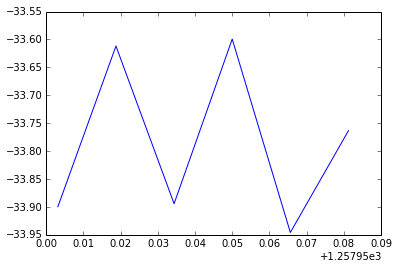

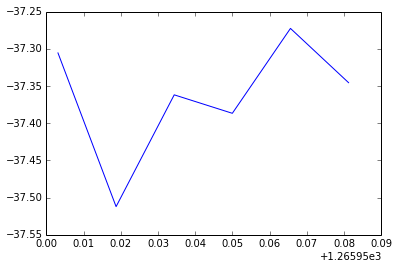

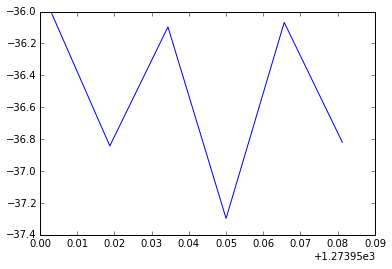

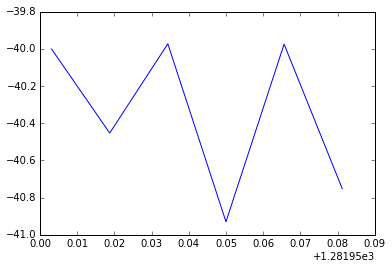

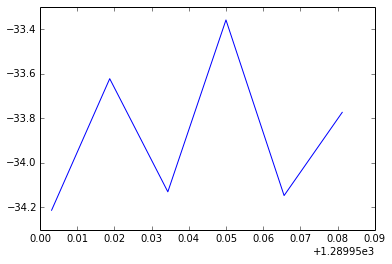

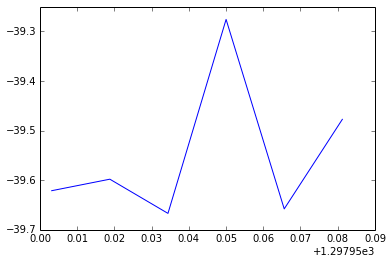

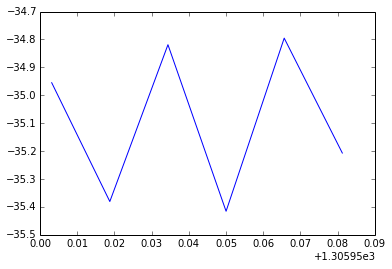

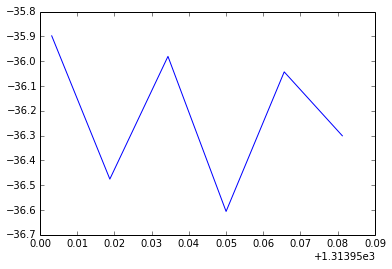

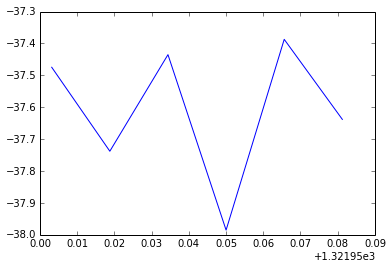

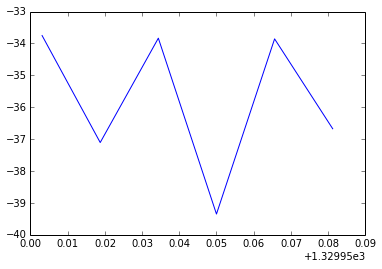

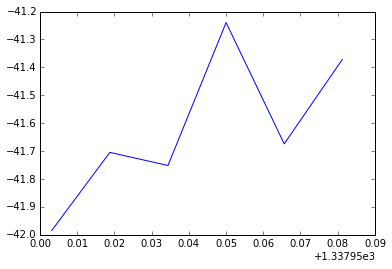

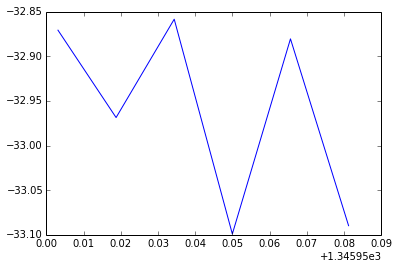

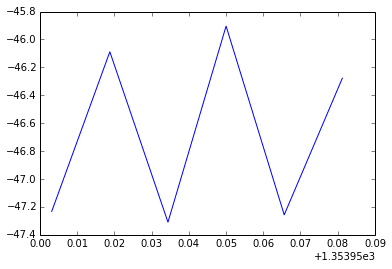

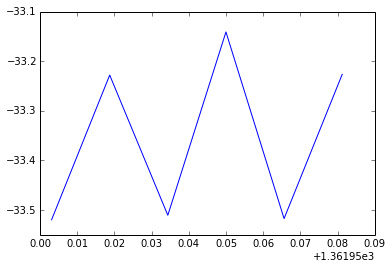

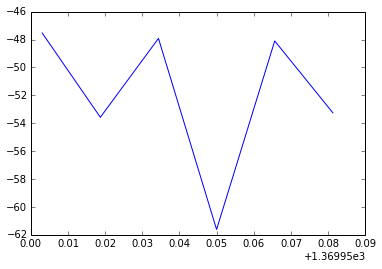

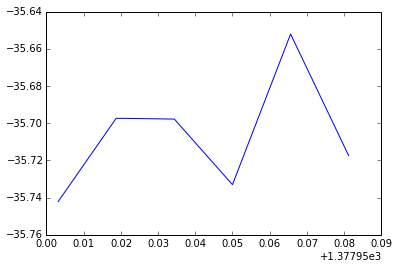

In [35]:
for idx in np.unique(swp.sweep_indexes):
    figure()
    fr,s21,err = swp.select_index(idx)
    plot(fr,20*np.log10(np.abs(s21)))
    #plot(fr,20*np.log10(np.abs(s21)+np.abs(err)))
    #plot(fr,20*np.log10(np.abs(s21)-np.abs(err)))
    #plot(fr,np.abs(err)/np.abs(s21))
    

In [72]:
blk = swp.blocks[902]

In [94]:
ri.tone_bins.shape

(258, 4)

In [171]:
ri.select_bank(128)

In [172]:
ri.select_fft_bins(range(8))

In [163]:
ri.r.write_int('debug',0)

In [173]:
d,addr = ri.get_data(4,demod=False)

In [174]:
d.dtype

dtype('complex64')

In [175]:
d[:10,:].copy().view('float32').astype('>i4')*2

array([[ 440,   62,  214, -212,   28,  318,   -2,  332,  -82,   -6, -124,
        -164,  -48,   90, -168,  130],
       [-456,  -56, -170,  178,  -62, -332,   42, -364,  102,    8,   80,
         134,   20, -110,  180, -130],
       [ 432,   66,  206, -168,   34,  294,   14,  344, -100,   -8, -108,
        -114,  -46,  106, -152,  136],
       [-462,  -38, -198,  194,  -44, -342,   26, -362,   82,   16,   98,
         148,   24,  -92,  174, -138],
       [ 438,   66,  204, -182,   16,  366,    0,  384,  -98,  -28, -146,
        -162,  -24,   86, -174,  122],
       [-440,  -26, -210,  124,  -26, -340,   56, -364,  104,   -4,  120,
         160,    6,  -84,  160, -136],
       [ 438,   60,  210, -192,   34,  358,  -44,  334,  -96,  -22,  -80,
        -114,   -4,  100, -146,  154],
       [-488,  -68, -198,  174,  -38, -308,  -24, -352,   88,    8,  106,
         140,   38,  -98,  194, -118],
       [ 474,   44,  202, -196,   12,  334,  -44,  368,  -84,  -18,  -80,
        -142,  -20,  1

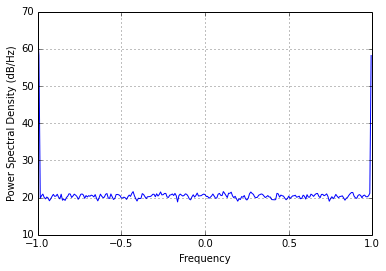

In [176]:
blah = psd(d[:,3])

In [140]:
dmod = ri.demodulator.demodulate(d[:,3],11519,ri.tone_nsamp,0,5760)

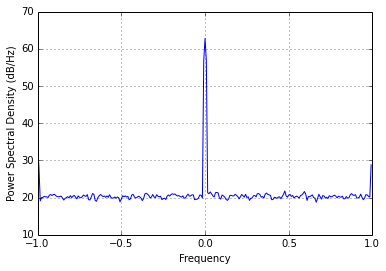

In [141]:
blah = psd(dmod)

In [177]:
ri.readout_fft_bins

array([1696, 2080, 2336, 2400, 5472, 5696, 6112, 6336])

In [178]:
ri.fpga_fft_readout_indexes

array([1696, 2080, 2336, 2400, 5472, 5696, 6112, 6336])

In [181]:
ri.tone_bins[128]/2.

array([ 1695.5,  2079.5,  2335.5,  2399.5,  5471.5,  5695.5,  6111.5,
        6335.5])

In [112]:
blk.tone

11519

In [73]:
blk.fftbin

5761

In [113]:
blk.tone*blk.fs/blk.nsamp+1210

1389.984375

In [139]:
kid_readout.roach.heterodyne.tone_offset_frequency(blk.tone,blk.nsamp,blk.fftbin-0,blk.nfft)

-1.5

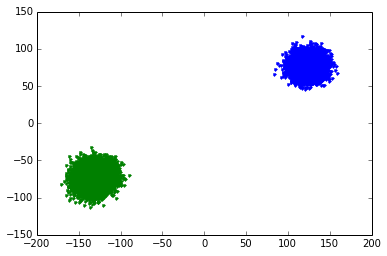

In [89]:
plot(swp.blocks[903].data.real,swp.blocks[903].data.imag,'.')
plot(swp.blocks[904].data.real,swp.blocks[904].data.imag,'.')
#plot(swp.blocks[910].data.real)


In [208]:
dblk = np.vstack([blk.data for blk in swp2.blocks])

In [204]:
dblk.shape

(16384, 8192)

In [209]:
dfft = 20*np.log10(np.abs(np.fft.fft(dblk,axis=1)))

In [206]:
dfft.shape

(16384, 8192)

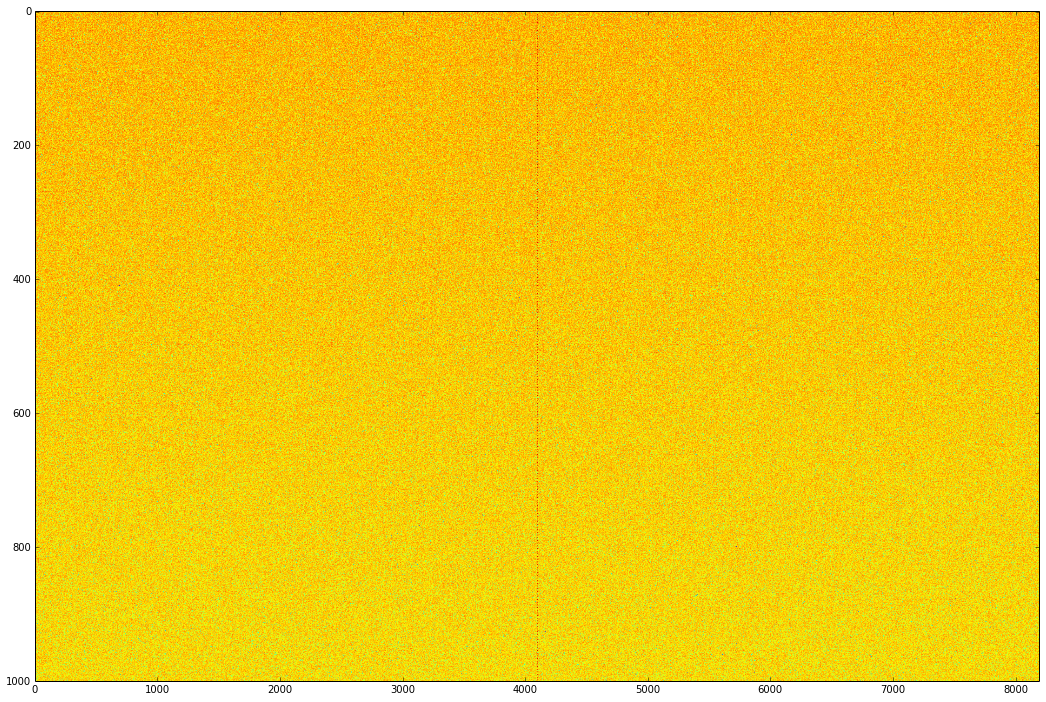

In [210]:
figure(figsize=(18,12))
imshow(dfft[-1000:,1:],aspect='auto')

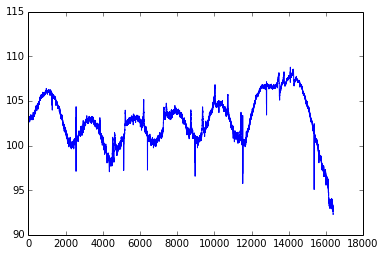

In [213]:
plot(dfft.max(1))

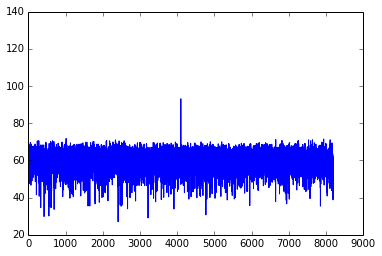

In [68]:
plot(dfft[902])

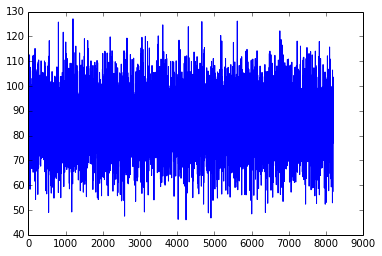

In [63]:
plot(swp.blocks[0].data)

In [67]:
dfft[:,1:].max(1).argmax()

902

In [7]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(128) + 10 + ri.lo_frequency,np.arange(0,128)/128.,nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [8]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.2 6.4 6.6 6.8 7.0 7.2 7.4 7.6 7.8 8.0 8.2 8.4 8.6 8.8 9.0 9.2 9.4 9.6 9.8 10.0 10.2 10.4 10.5 10.7 10.9 detected mcnt overflow None 114913 0 65536 0 144 114913
11.1 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9 14.1 14.3 14.5 14.6 14.8 15.0 15.2 15.4 15.6 15.8 16.0 16.2 16.4 16.6 16.8 17.0 17.2 detected mcnt overflow None 224 0 65536 0 672 224
17.4 17.6 17.8 18.0 18.2 18.4 18.6 18.8 18.9 19.1 19.3 19.5 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3 22.5 22.7 22.9 23.0 23.2 23.4 23.6 23.8 24.0 24.2 24.4 24.6 24.8 25.0 25.2 25.4 25.6 25.8 26.0 26.2 26.4 26.6 26.8 27.0 27.1 27.3 27.5 27.7 27.9 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9 30.1 30.3 30.5 30.7 30.9 31.1 31.2 31.4 31.6 31.8 32.0 32.2 32.4 32.6 32.8 33.0 33.2 33.4 33.6 33.8 34.0 34.2 34.4 34.6 34.8 35.0 35.2 35.4 35.5 35.7 35.9 36.1 detected mcnt o

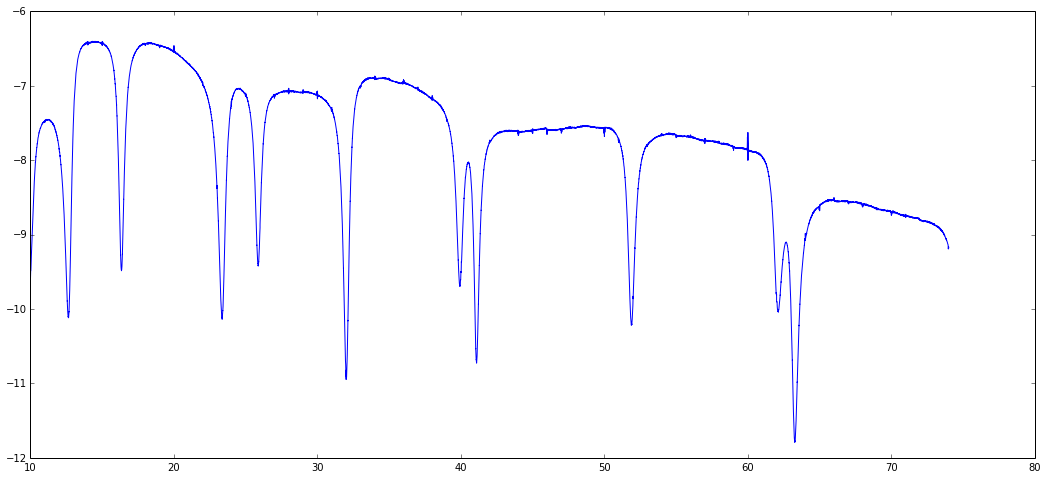

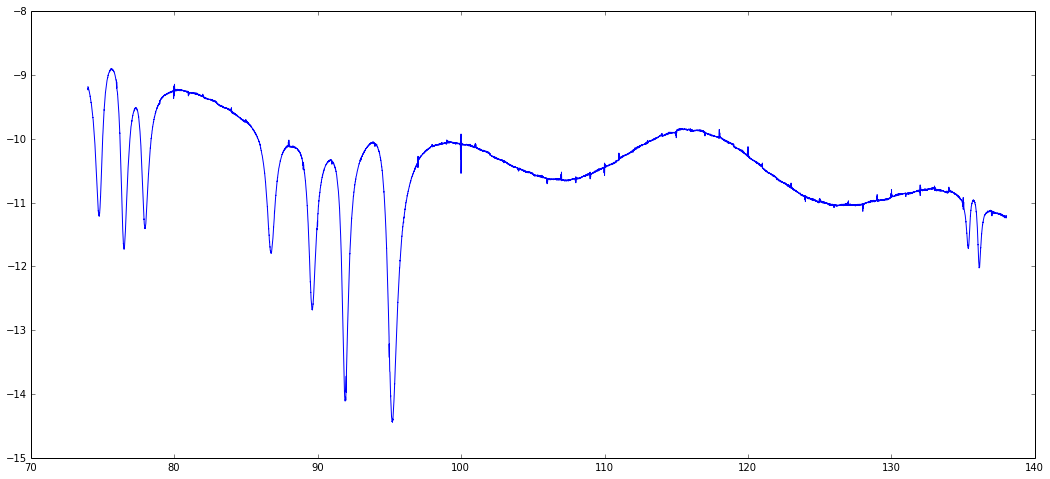

In [9]:
figure(figsize=(18,8))
plot(swp.freqs[:swp.freqs.shape[0]//2]-1210,20*np.log10(np.abs(swp.data[:swp.freqs.shape[0]//2])))
figure(figsize=(18,8))
plot(swp.freqs[swp.freqs.shape[0]//2:]-1210,20*np.log10(np.abs(swp.data[swp.freqs.shape[0]//2:])))

In [10]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(128) + 100 + ri.lo_frequency,np.arange(0,128)/128.,nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [11]:
swp2 = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 0.2 0.4 0.6 0.8 1.0 1.2 1.4 1.6 1.8 2.0 2.1 2.3 2.5 detected mcnt overflow None 916274 0 65536 0 288 916274
2.7 2.9 3.1 3.3 3.5 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.2 6.4 6.6 6.8 7.0 7.2 7.4 7.6 7.8 8.0 8.2 8.4 8.6 8.8 detected mcnt overflow None 31537 0 65536 0 848 31537
9.0 9.2 9.4 9.6 9.8 10.0 10.2 10.4 10.5 10.7 10.9 11.1 11.3 11.5 11.7 11.9 12.1 12.3 12.5 12.7 12.9 13.1 13.3 13.5 13.7 13.9 14.1 14.3 14.5 14.6 14.8 15.0 15.2 15.4 15.6 15.8 16.0 16.2 16.4 16.6 16.8 17.0 17.2 17.4 17.6 17.8 18.0 18.2 18.4 18.6 18.8 18.9 19.1 19.3 19.5 19.7 19.9 20.1 20.3 20.5 20.7 20.9 21.1 21.3 21.5 21.7 21.9 22.1 22.3 22.5 22.7 22.9 23.0 23.2 23.4 23.6 23.8 24.0 24.2 24.4 24.6 24.8 25.0 25.2 25.4 25.6 25.8 26.0 26.2 26.4 26.6 26.8 27.0 27.1 27.3 27.5 27.7 detected mcnt overflow None 228126 0 65536 0 128 228126
27.9 28.1 28.3 28.5 28.7 28.9 29.1 29.3 29.5 29.7 29.9 30.1 30.3 30.5 30.7 30.9 31.1 31.2 31.4 31.6 31.8 32.0 32.2 32.4 32.6 32.8 33.0 33.2 33.4 33.6 33.8 34.0 detected m

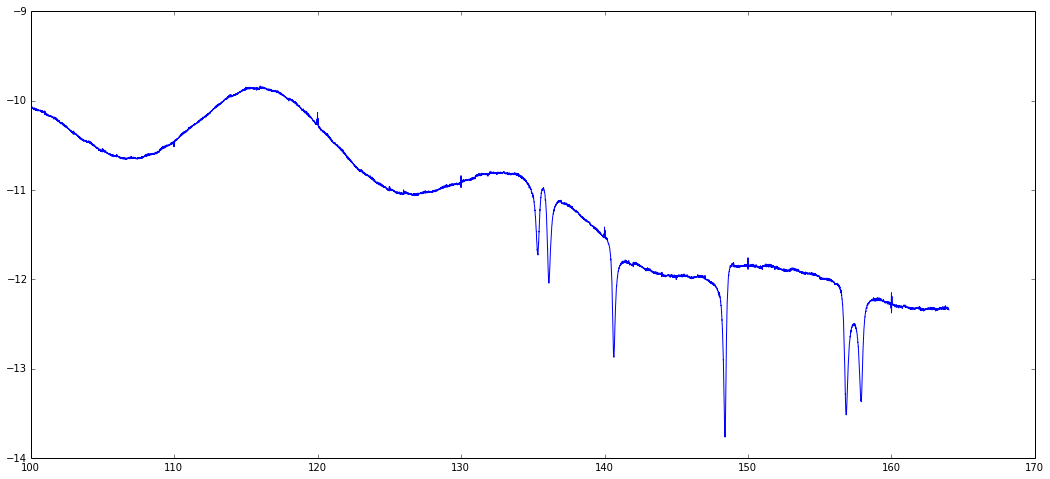

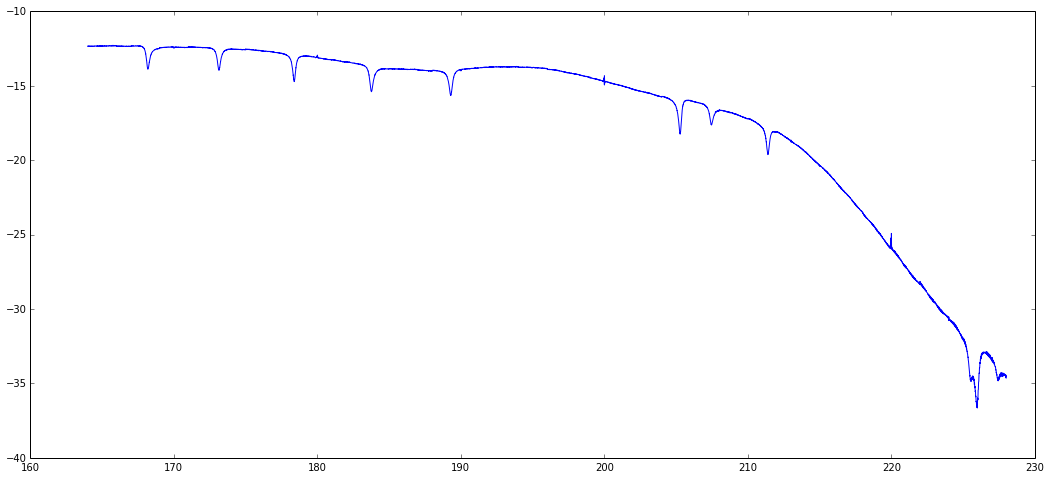

In [12]:
figure(figsize=(18,8))
plot(swp2.freqs[:swp2.freqs.shape[0]//2]-1210,20*np.log10(np.abs(swp2.data[:swp2.freqs.shape[0]//2])))
figure(figsize=(18,8))
plot(swp2.freqs[swp2.freqs.shape[0]//2:]-1210,20*np.log10(np.abs(swp2.data[swp2.freqs.shape[0]//2:])))

In [193]:
f0s = np.load('/data/readout/resonances/2015-11-03-starcryo-nevins-initial-resonances-160mK.npy')

In [196]:
f0s-1210

array([  10.   ,   12.687,   16.25 ,   23.25 ,   25.937,   32.   ,
         39.812,   41.062,   51.812,   62.187,   63.375,   74.812,
         76.562,   77.937,   86.75 ,   89.562,   91.937,   95.187,
        148.437,  168.125,  157.875,  156.812,  173.125,  178.312,
        183.75 ,  189.312,  205.312,  207.437,  211.375,  225.937,
        246.125,  254.   ])

In [214]:
x,y = ri.get_raw_adc()

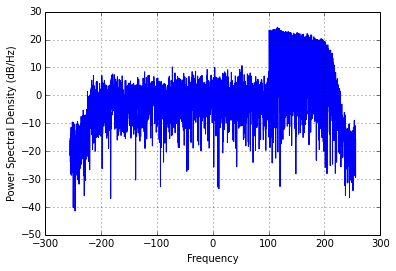

In [215]:
blah = psd(y+1j*x,NFFT=len(x),Fs=512.)